# Imports

In [1]:
import importlib
import SYT
import time
import os
import matplotlib.pyplot as plt

importlib.reload(SYT)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<module 'SYT' from '/Users/hansonmo/Downloads/AI-for-Mathematics-master/AI-for-Mathematics/6_20_2024_SYT/SYT.py'>

## SYT Helper Functions.
Implement the functions `is_valid_SYT` and `reshape_perm` then run this cell to test your helper functions. 

In [2]:
print(SYT.is_valid_SYT(((1, 2, 3), (4, 5, 6), (7, 8, 9)))) # True
print(SYT.is_valid_SYT(((1, 2, 3), (5, 4), (6,)))) # False

print(SYT.reshape_perm((1, 2, 3, 4, 5, 6), (3, 2, 1))) # ((1, 2, 3), (4, 5), (6,))
print(SYT.reshape_perm((1, 2, 3, 4, 5, 6), (3, 3))) # ((1, 2, 3), (4, 5, 6))

True
False
((1, 2, 3), (4, 5), (6,))
((1, 2, 3), (4, 5, 6))


# Generate all SYTs
Implement `SYTs` and generate all valid SYTs for the following shapes:
- (4,3,2,1)
- (2,2)
- (3,3)
- (4,4)
- (5,5)

Save your SYTs in the `data` subfolder. For example, the SYTs of shape (4,3,2,1) are saved in `data/SYTs_4_3_2_1.txt`.

What do you notice about SYTs of shape (n,n)? Write your observation in this cell here:


In [3]:
# Generate SYTs
shapes = [(4,3,2,1), (2,2), (3,3), (4,4), (5,5)]

# Generate and save SYTs for each shape
for shape in shapes:
    SYT.save_SYTs_to_file(shape)

# Generating Random SYTs
Implement `random_SYT` and `random_SYT_2` and compare the efficacy on the shape (2,2,2).

Print out how long it takes to generate 10000 samples using each function and compare the distributions to the uniform distribution.

Plot the distributions using matplotlib and save them in the `figures` subfolder.

In [4]:
shape = (2,2,2)

# Generate and measure time for random_SYT
distribution = {syt: 0 for syt in SYT.SYTs(shape)}
start_time = time.time()
for i in range(10000):
  syt = SYT.random_SYT(shape)
  distribution[syt] += 1
time_random_SYT = time.time() - start_time

# Generate and measure time for random_SYT_2
distribution2 = {syt: 0 for syt in SYT.SYTs(shape)}
start_time = time.time()
for i in range(10000):
  syt = SYT.random_SYT_2(shape)
  distribution2[syt] += 1
time_random_SYT_2 = time.time() - start_time

# Print out the time taken
print(f'Time taken for random_SYT: {time_random_SYT:.2f} seconds')
print(f'Time taken for random_SYT_2: {time_random_SYT_2:.2f} seconds')

Time taken for random_SYT: 7.09 seconds
Time taken for random_SYT_2: 13.97 seconds


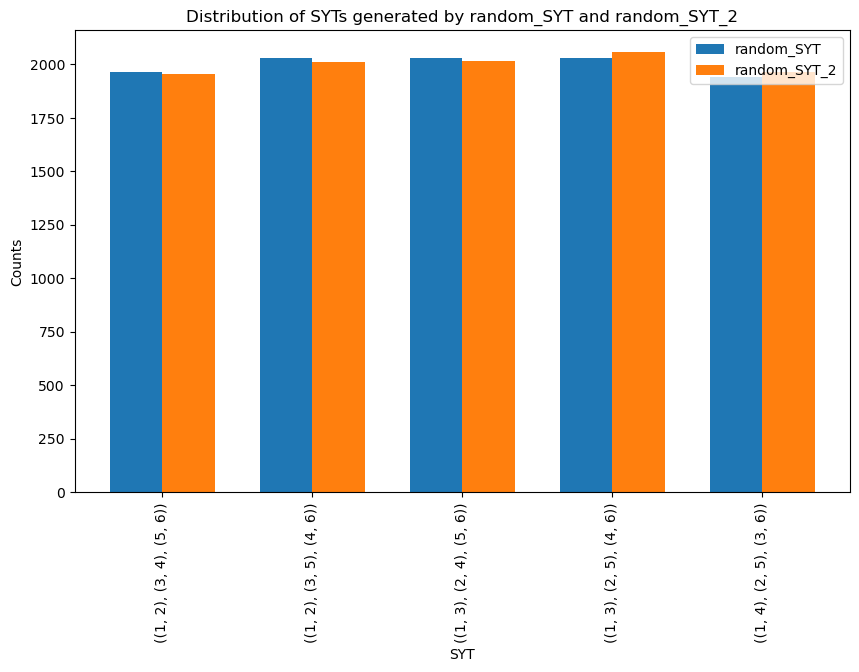

In [5]:
# Prepare data for plotting
labels = list(distribution.keys())
random_SYT_counts = list(distribution.values())
random_SYT_2_counts = list(distribution2.values())

# Plot the distributions
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(labels))
width = 0.35

ax.bar(x, random_SYT_counts, width, label='random_SYT')
ax.bar([i + width for i in x], random_SYT_2_counts, width, label='random_SYT_2')

ax.set_xlabel('SYT')
ax.set_ylabel('Counts')
ax.set_title('Distribution of SYTs generated by random_SYT and random_SYT_2')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels([str(label) for label in labels], rotation=90)
ax.legend()

# Save the figure
os.makedirs('figures', exist_ok=True)
plt.savefig('figures/SYT_distributions.png')
plt.show()

Time taken for random_SYT: 7.21 seconds
Time taken for random_SYT_2: 14.44 seconds


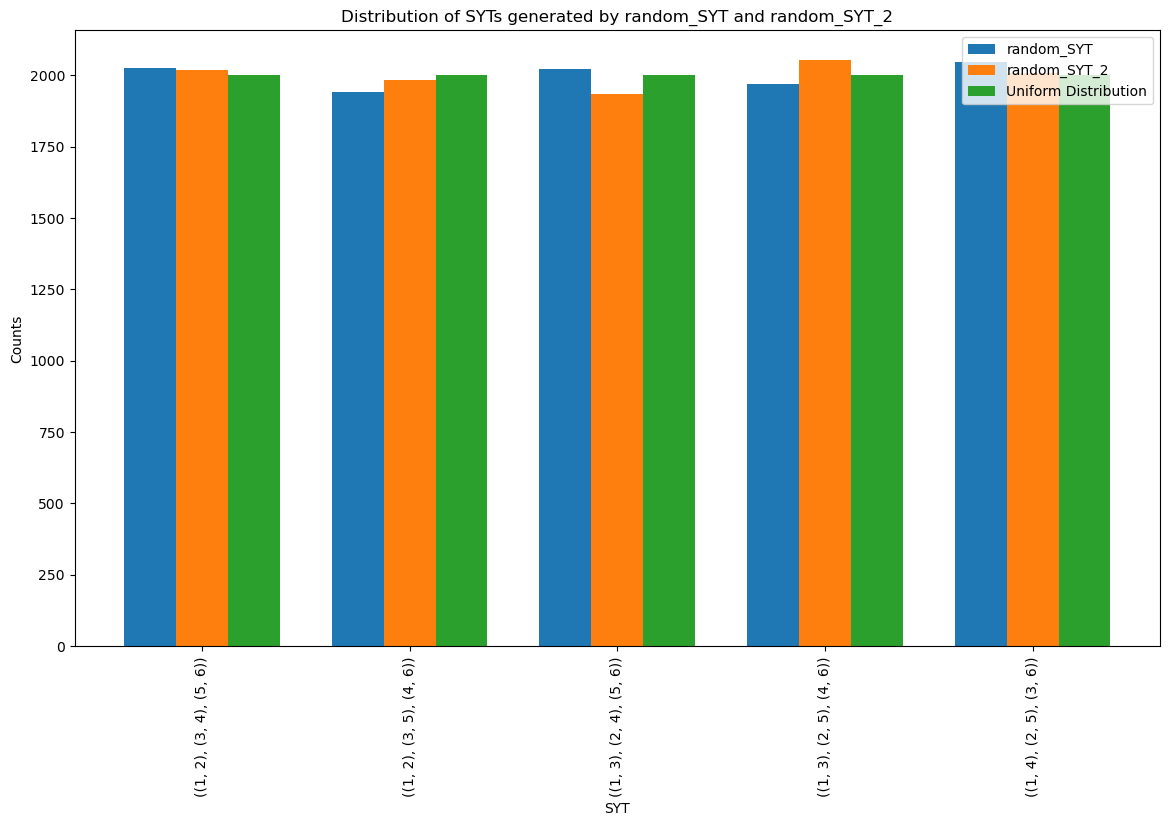

In [8]:
# Define the shape
shape = (2, 2, 2)

# Generate and measure time for random_SYT
valid_SYTs = SYT.SYTs(shape)
distribution = {syt: 0 for syt in valid_SYTs}
start_time = time.time()
for i in range(10000):
    syt = SYT.random_SYT(shape)
    distribution[syt] += 1
time_random_SYT = time.time() - start_time

# Generate and measure time for random_SYT_2
distribution2 = {syt: 0 for syt in valid_SYTs}
start_time = time.time()
for i in range(10000):
    syt = SYT.random_SYT_2(shape)
    distribution2[syt] += 1
time_random_SYT_2 = time.time() - start_time

# Calculate uniform distribution
uniform_distribution = {syt: 10000 / len(valid_SYTs) for syt in valid_SYTs}

# Print out the time taken
print(f'Time taken for random_SYT: {time_random_SYT:.2f} seconds')
print(f'Time taken for random_SYT_2: {time_random_SYT_2:.2f} seconds')

# Prepare data for plotting
labels = list(distribution.keys())
random_SYT_counts = list(distribution.values())
random_SYT_2_counts = list(distribution2.values())
uniform_counts = list(uniform_distribution.values())

# Plot the distributions
fig, ax = plt.subplots(figsize=(14, 8))

x = range(len(labels))
width = 0.25

ax.bar(x, random_SYT_counts, width, label='random_SYT')
ax.bar([i + width for i in x], random_SYT_2_counts, width, label='random_SYT_2')
ax.bar([i + 2 * width for i in x], uniform_counts, width, label='Uniform Distribution')

ax.set_xlabel('SYT')
ax.set_ylabel('Counts')
ax.set_title('Distribution of SYTs generated by random_SYT and random_SYT_2')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([str(label) for label in labels], rotation=90)
ax.legend()

# Save the figure
os.makedirs('figures', exist_ok=True)
plt.savefig('figures/SYT_distributions_with_uniform.png')
plt.show()